# Image retrieval using deep features

In [1]:
import turicreate as tc

# Load some CIFAR-10 images

In [2]:
image_data = tc.SFrame('data/image_train_data/')

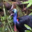

In [4]:
image_data['image'][0]

# Compute deep features from our images

In [ ]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_data['deep_features'] = deep_learning_model.extract_features(image_data)

In [ ]:
image_data

# Create a nearest neighbors model to retrieve images from deep features

In [5]:
knn_model = tc.nearest_neighbors.create(image_data,
                                        features = ['deep_features'],
                                        label = 'id')

Starting brute force nearest neighbors model training.

# Use image retrieval model with deep features to find similar images

In [6]:
cat = image_data[18:19]

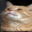

In [7]:
cat['image'][0]

In [8]:
knn_model.query(cat)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 8.582ms      |

| Done         |         | 100         | 84.139ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,384,0.0,1
0,6910,36.94031379506751,2
0,39777,38.46348889747021,3
0,36870,39.75596231189652,4
0,41734,39.786601414815024,5


In [9]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'], 'id')

In [10]:
cat_neighbors = get_images_from_ids(knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 9.958ms      |

| Done         |         | 100         | 84.695ms     |

+--------------+---------+-------------+--------------+

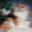

In [13]:
cat_neighbors['image'][2]

# Find images similar to a car

In [14]:
car = image_data[8:9]

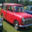

In [15]:
car['image'][0]

In [17]:
car_likes = get_images_from_ids(knn_model.query(car))['image']

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 14.22ms      |

| Done         |         | 100         | 96.071ms     |

+--------------+---------+-------------+--------------+

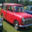

In [18]:
car_likes[0]

# Create a lambda function to find and show nearest neighbors to an image

In [19]:
show_neighbors = lambda i: get_images_from_ids(knn_model.query(image_data[i:i+1]))['image'][1]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.918ms      |

| Done         |         | 100         | 101.505ms    |

+--------------+---------+-------------+--------------+

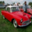

In [20]:
show_neighbors(8)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 7.917ms      |

| Done         |         | 100         | 88.806ms     |

+--------------+---------+-------------+--------------+

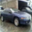

In [21]:
show_neighbors(26)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 11.025ms     |

| Done         |         | 100         | 81.686ms     |

+--------------+---------+-------------+--------------+

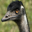

In [22]:
show_neighbors(500)